In [1]:
import os
import urllib

# Download the data
API_KEY = "PO6RG0NM9390YF3A"
STOCK_SYMBOL = "SPY"
INTERVAL = "1min"
DATA_TYPE = "DAILY" # INTRADAY || DAILY || WEEKLY || MONTHLY

if DATA_TYPE == "intraday":
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={STOCK_SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
else:
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_{DATA_TYPE}&symbol={STOCK_SYMBOL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
filename = STOCK_SYMBOL+"_"+DATA_TYPE+".csv"
datapath = "rawdata/"
os.makedirs(datapath, exist_ok=True)
urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath+filename)
print('Download complete.')

Download complete.


# Data Preprocessing

In [2]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import datetime

# Load the data
stock_data = pd.read_csv(datapath + filename, thousands=',')

# reverse data so it is in ascending timestamp order
stock_data = stock_data.iloc[::-1]
print(stock_data)

timestamp    open    high     low   close     volume
99  2019-12-03  308.65  309.64  307.13  309.55   74784721
98  2019-12-04  310.70  312.12  310.32  311.46   49007961
97  2019-12-05  312.23  312.25  310.58  312.02   40657041
96  2019-12-06  314.11  315.31  314.11  314.87   48926121
95  2019-12-09  314.44  315.18  313.80  313.88   34788380
..         ...     ...     ...     ...     ...        ...
4   2020-04-21  276.73  278.04  272.02  273.04  125772551
3   2020-04-22  278.35  281.00  276.91  279.10   92831657
2   2020-04-23  280.49  283.94  278.75  279.08  103685412
1   2020-04-24  280.73  283.70  278.50  282.97   85042563
0   2020-04-27  285.12  288.27  284.62  287.05   72845666

[100 rows x 6 columns]


In [3]:
stock_data.describe()

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,301.509940,304.870319,298.602230,301.818000,1.303226e+08
std,31.594647,29.229505,33.456628,31.376554,9.484142e+07
min,228.190000,229.683300,218.260000,222.950000,2.027001e+07
25%,278.155000,281.755000,274.970000,278.090000,5.458928e+07
50%,314.435000,318.050000,313.955000,314.645000,8.514558e+07
75%,326.210000,327.865000,324.002850,326.627500,1.887670e+08
max,337.790000,339.080000,337.480000,338.340000,3.896121e+08


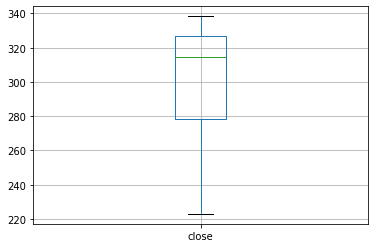

In [4]:
stock_data.boxplot('close')

# Data Analysis

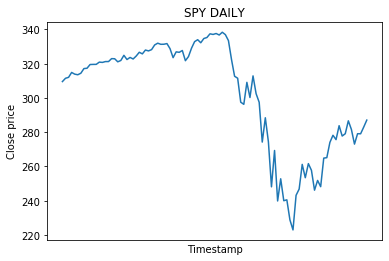

In [5]:
# Plot close price
plt.plot(stock_data['timestamp'], stock_data['close'])
plt.xlabel('Timestamp')
plt.ylabel('Close price')
plt.title(f'{STOCK_SYMBOL} {DATA_TYPE}')
# plt.xticks(np.arange(len(stock_data), 0, step=10))
plt.xticks([])
plt.show()

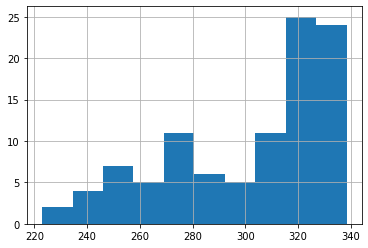

In [6]:
stock_data['close'].hist()

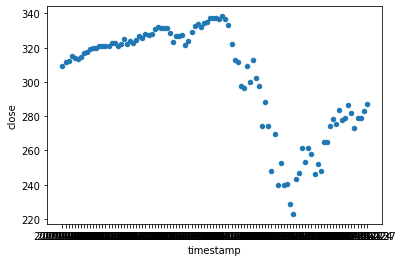

In [7]:
stock_data.plot.scatter(x='timestamp',y='close')

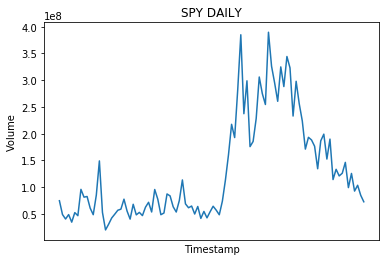

In [8]:
# Plot volume
plt.plot(stock_data['timestamp'], stock_data['volume'])
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title(f'{STOCK_SYMBOL} {DATA_TYPE}')
# plt.xticks(np.arange(len(stock_data), 0, step=10))
plt.xticks([])
plt.show()